In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
import numpy as np
import shutil

In [2]:
all_annotations_path="../MBG Database/annotations_all/"
all_classes=os.listdir(all_annotations_path)


In [79]:
len(all_classes)
if ".DS_Store" in all_classes:
    all_classes.remove(".DS_Store")

In [118]:
all_classes.sort() 
print(all_classes)

['bottle', 'bucket', 'pool', 'puddle', 'tire', 'watertank']


In [119]:
# change the values from 0 to 5 and manually run the notebook .. phew

class_=all_classes[5]

In [120]:
print(class_)

watertank


In [121]:
this_class_annotations_path=all_annotations_path+class_
all_class_annotations=os.listdir(this_class_annotations_path)

dic_class_annotations={}



In [122]:
for annot in all_class_annotations:
#     print(annot)
    vid_num=annot.split("_")[0][-2:]
#     print(vid_num)
    if vid_num not in dic_class_annotations:
        dic_class_annotations[vid_num]=[]
    frame_num=annot.split("_")[-1].split(".")[0]
    dic_class_annotations[vid_num].append(frame_num)
#     print(frame_num)
     
#     break

In [123]:
dic_class_annotations

{'10': ['5170',
  '113',
  '4784',
  '1364',
  '941',
  '1167',
  '695',
  '7',
  '6014',
  '5832',
  '388',
  '478',
  '4536',
  '1546',
  '5628',
  '1035',
  '2332',
  '4911',
  '1741',
  '5600',
  '1276',
  '2300',
  '4801',
  '622',
  '354',
  '5662',
  '60',
  '726',
  '1244',
  '342',
  '1843',
  '5210',
  '1010',
  '1780',
  '4558',
  '266',
  '4566',
  '1728',
  '6009',
  '4883',
  '1586',
  '4487',
  '1294',
  '1013',
  '5613',
  '56',
  '5469',
  '950',
  '1122',
  '5694',
  '293',
  '5362',
  '5855',
  '3856',
  '4835',
  '1637',
  '5429',
  '350',
  '2483',
  '264',
  '67',
  '1584',
  '29',
  '4509',
  '4775',
  '4422',
  '5781',
  '1591',
  '83',
  '2758',
  '1583',
  '5521',
  '1160',
  '4538',
  '4895',
  '1884',
  '5552',
  '4295',
  '1052',
  '5467',
  '2757',
  '687',
  '737',
  '5578',
  '4829',
  '4872',
  '4353',
  '5850',
  '170',
  '2032',
  '2785',
  '1764',
  '4907',
  '156',
  '1921',
  '2400',
  '5842',
  '1430',
  '4854',
  '5573',
  '5668',
  '103',
  '148

In [124]:
annot

'video10_321.txt'

In [125]:
dic_annotations=dic_class_annotations
class_exists_in=[]
images_location="../MBG Database/train_images"
all_images=os.listdir(images_location)
for image_name in all_images:
#     print(image_name)
    vid_num=image_name.split("_")[0][-2:]
    if vid_num not in dic_annotations:
        continue
#     print(vid_num)
    frame_num=image_name.split(".")[0].split("_")[-1]
#     print(frame_num)
    if frame_num in dic_annotations[vid_num]:
        class_exists_in.append(image_name)
    
    
    


In [126]:
len(class_exists_in),len(all_class_annotations)

(11160, 11160)

In [127]:
image_name=class_exists_in[10]
test_img=images_location+"/"+image_name
vid_num=image_name.split("_")[0][-2:]
frame_num=image_name.split(".")[0].split("_")[-1]

annotations_file="video"+str(vid_num)+"_"+str(frame_num)+".txt"
test_annotation=this_class_annotations_path+"/"+annotations_file
print(test_img,test_annotation)

../MBG Database/train_images/video10_frame_4677.jpeg ../MBG Database/annotations_all/watertank/video10_4677.txt


In [128]:
img=cv2.imread(test_img)

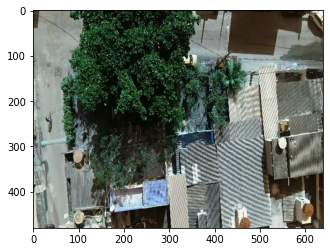

In [129]:
plt.imshow(img)

In [130]:
img.shape

(480, 640, 3)

['0 0.7325988769531251 0.974875 0.03389892578124998 0.050018518518518504', '0 0.9490930175781249 0.9151226851851851 0.03831298828124996 0.060319444444444426', '0 0.159571533203125 0.9505810185185186 0.038244628906249994 0.06257870370370373', '0 0.158992919921875 0.6701203703703704 0.039973144531250004 0.06158333333333332', '0 0.85973876953125 0.6109074074074073 0.03006347656249997 0.05188888888888885', '0 0.86716552734375 0.5332129629629629 0.028710937499999978 0.048009259259259175']
[[0.0, 0.7325988769531251, 0.974875, 0.03389892578124998, 0.050018518518518504], [0.0, 0.9490930175781249, 0.9151226851851851, 0.03831298828124996, 0.060319444444444426], [0.0, 0.159571533203125, 0.9505810185185186, 0.038244628906249994, 0.06257870370370373], [0.0, 0.158992919921875, 0.6701203703703704, 0.039973144531250004, 0.06158333333333332], [0.0, 0.85973876953125, 0.6109074074074073, 0.03006347656249997, 0.05188888888888885], [0.0, 0.86716552734375, 0.5332129629629629, 0.028710937499999978, 0.0480092

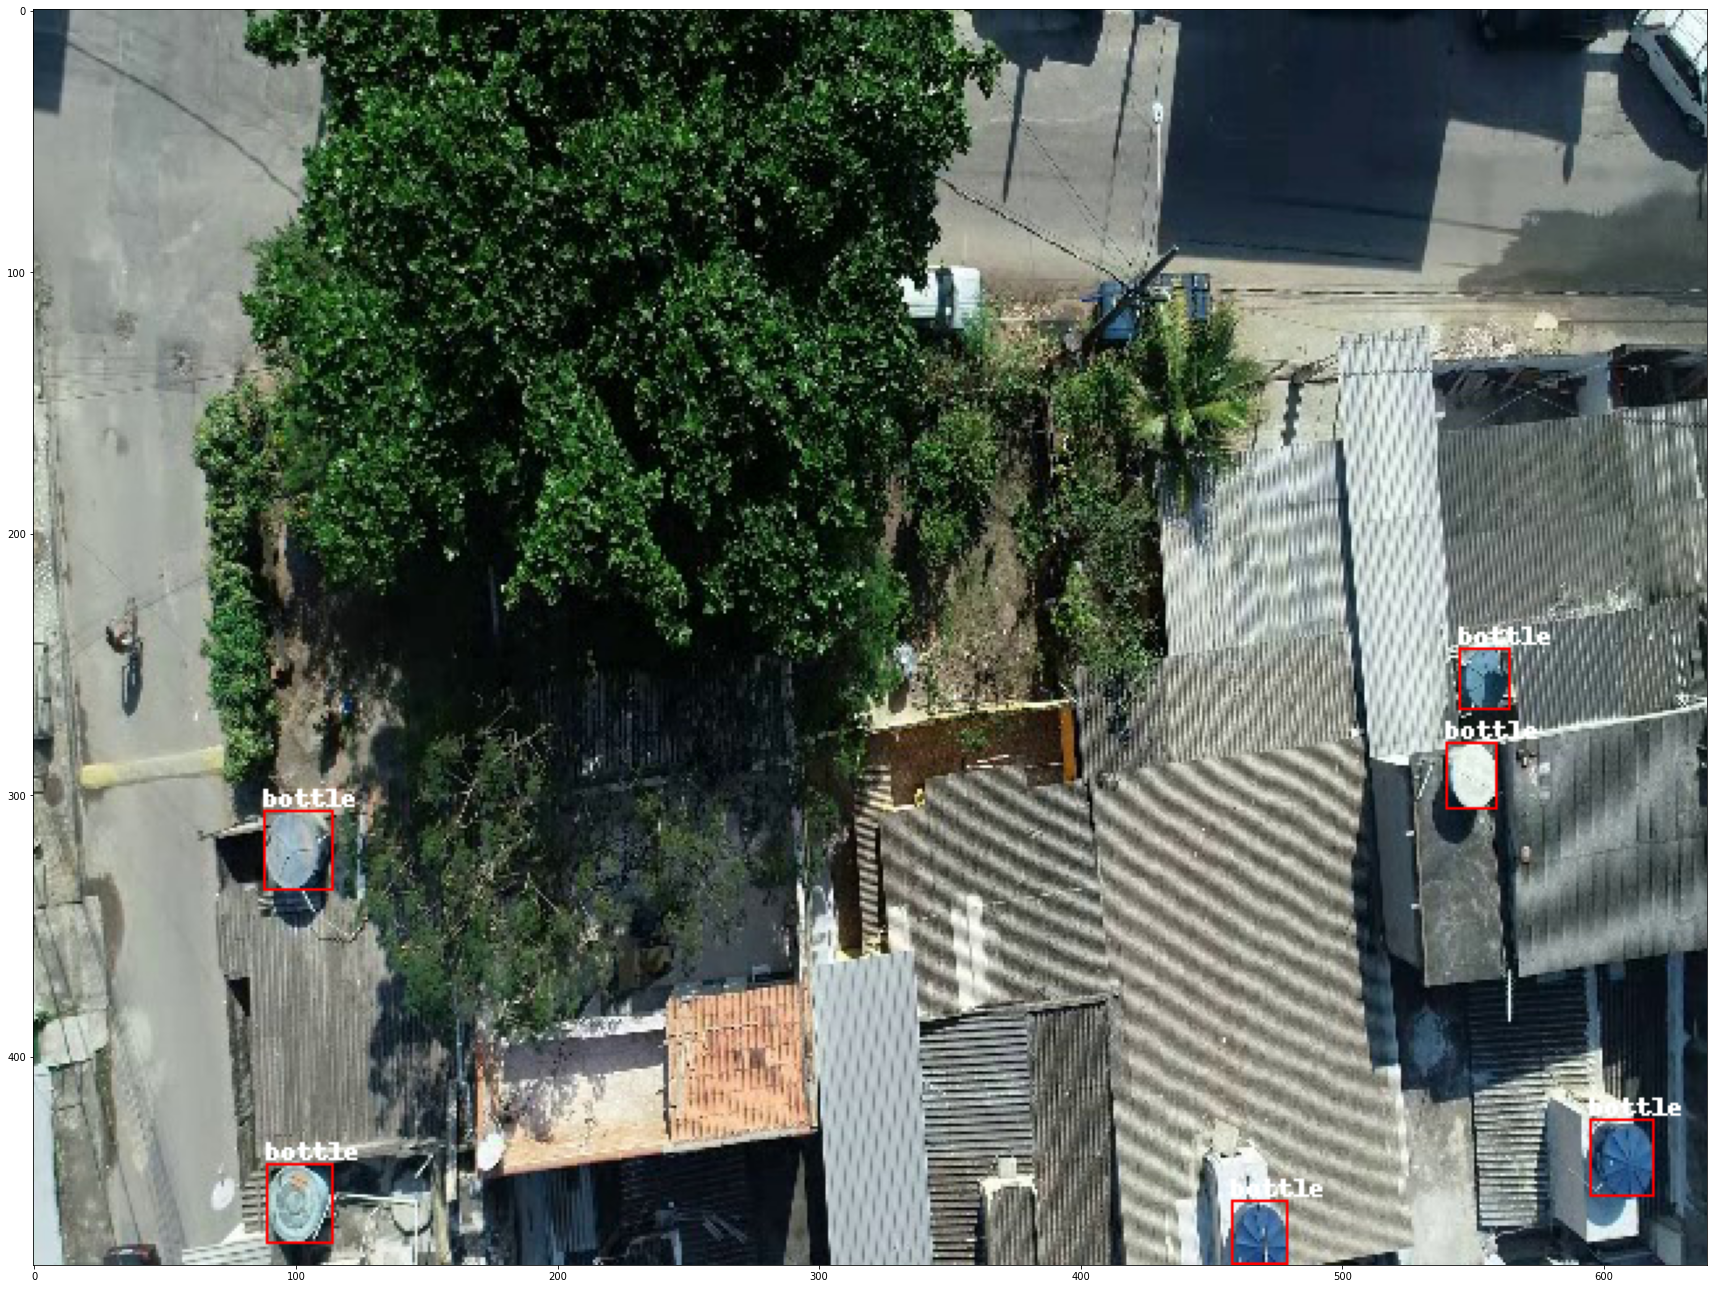

In [131]:
def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)), outline=(255,0,0))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    plt.figure(figsize=(30, 30))
    plt.imshow(np.array(image))
    plt.show()    
    
class_id_to_name_mapping = {
    0.0:"bottle",
    1.0:"bucket",
    2.0:"pool",
    3.0:"puddle",
    4.0:"tire",
    5.0:"watertank"
}


# Get any random annotation file 
# annotation_file = random.choice(annotations)

annotation_file = test_annotation
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    print(annotation_list)
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]
    print(annotation_list)

#Get the corresponding image file
image_file = test_img
print("file is ",image_file)
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [132]:
# now let us collect all files and put them in one place

In [133]:
class_exists_in

['video11_frame_4972.jpeg',
 'video03_frame_4133.jpeg',
 'video10_frame_900.jpeg',
 'video10_frame_5865.jpeg',
 'video10_frame_1872.jpeg',
 'video11_frame_7188.jpeg',
 'video10_frame_4748.jpeg',
 'video10_frame_6014.jpeg',
 'video10_frame_4780.jpeg',
 'video10_frame_5615.jpeg',
 'video10_frame_4677.jpeg',
 'video11_frame_5019.jpeg',
 'video10_frame_2304.jpeg',
 'video11_frame_5551.jpeg',
 'video10_frame_4681.jpeg',
 'video11_frame_4173.jpeg',
 'video10_frame_4696.jpeg',
 'video10_frame_1768.jpeg',
 'video03_frame_410.jpeg',
 'video10_frame_2317.jpeg',
 'video11_frame_5483.jpeg',
 'video03_frame_4086.jpeg',
 'video11_frame_4310.jpeg',
 'video03_frame_3015.jpeg',
 'video10_frame_2509.jpeg',
 'video10_frame_1446.jpeg',
 'video10_frame_5639.jpeg',
 'video03_frame_5002.jpeg',
 'video11_frame_5147.jpeg',
 'video03_frame_815.jpeg',
 'video11_frame_4229.jpeg',
 'video11_frame_6447.jpeg',
 'video11_frame_2106.jpeg',
 'video11_frame_6851.jpeg',
 'video03_frame_4664.jpeg',
 'video10_frame_728.jpe

In [134]:
class_

'watertank'

In [135]:


if not os.path.isfile("../MBG Database/classified_images/"+class_):
    os.mkdir("../MBG Database/classified_images/"+class_)

In [136]:
target_location="../MBG Database/classified_images/"+class_+"/"
source_location="../MBG Database/train_images/"
for frame_name in class_exists_in:
    # to make the name same as annotationsfile
    new_frame_name=frame_name.replace("_frame","")
    print(new_frame_name)
    source_path_complete=source_location+frame_name
    target_path_complete=target_location+new_frame_name
    shutil.copy(source_path_complete,target_path_complete)
    
#     break

video11_4972.jpeg
video03_4133.jpeg
video10_900.jpeg
video10_5865.jpeg
video10_1872.jpeg
video11_7188.jpeg
video10_4748.jpeg
video10_6014.jpeg
video10_4780.jpeg
video10_5615.jpeg
video10_4677.jpeg
video11_5019.jpeg
video10_2304.jpeg
video11_5551.jpeg
video10_4681.jpeg
video11_4173.jpeg
video10_4696.jpeg
video10_1768.jpeg
video03_410.jpeg
video10_2317.jpeg
video11_5483.jpeg
video03_4086.jpeg
video11_4310.jpeg
video03_3015.jpeg
video10_2509.jpeg
video10_1446.jpeg
video10_5639.jpeg
video03_5002.jpeg
video11_5147.jpeg
video03_815.jpeg
video11_4229.jpeg
video11_6447.jpeg
video11_2106.jpeg
video11_6851.jpeg
video03_4664.jpeg
video10_728.jpeg
video11_3717.jpeg
video11_3988.jpeg
video10_1127.jpeg
video10_437.jpeg
video11_4396.jpeg
video11_2398.jpeg
video11_4762.jpeg
video03_4073.jpeg
video09_3575.jpeg
video10_4675.jpeg
video10_909.jpeg
video03_442.jpeg
video10_1661.jpeg
video10_3840.jpeg
video10_4905.jpeg
video09_264.jpeg
video09_3594.jpeg
video10_295.jpeg
video09_763.jpeg
video09_3617.jpeg
vi

video10_879.jpeg
video11_4633.jpeg
video10_3807.jpeg
video03_3434.jpeg
video03_853.jpeg
video11_3822.jpeg
video10_1651.jpeg
video11_5364.jpeg
video10_5813.jpeg
video09_220.jpeg
video11_2207.jpeg
video10_144.jpeg
video11_6292.jpeg
video11_3934.jpeg
video03_456.jpeg
video03_904.jpeg
video09_3126.jpeg
video10_4917.jpeg
video10_5927.jpeg
video11_1919.jpeg
video11_6327.jpeg
video11_6606.jpeg
video11_3547.jpeg
video11_4940.jpeg
video10_1813.jpeg
video09_3001.jpeg
video11_7220.jpeg
video11_6350.jpeg
video11_3739.jpeg
video10_1037.jpeg
video09_2951.jpeg
video11_5944.jpeg
video10_4951.jpeg
video10_2791.jpeg
video12_2613.jpeg
video11_7126.jpeg
video10_5473.jpeg
video10_3819.jpeg
video10_1281.jpeg
video10_5510.jpeg
video10_1367.jpeg
video11_5260.jpeg
video09_3622.jpeg
video11_5002.jpeg
video11_6769.jpeg
video11_7649.jpeg
video11_4519.jpeg
video11_5031.jpeg
video10_1189.jpeg
video10_893.jpeg
video11_4771.jpeg
video10_4338.jpeg
video11_2384.jpeg
video11_1973.jpeg
video10_677.jpeg
video12_2569.jpeg


video11_2230.jpeg
video06_1612.jpeg
video11_3545.jpeg
video10_4583.jpeg
video10_1732.jpeg
video10_611.jpeg
video03_3461.jpeg
video10_5696.jpeg
video11_1974.jpeg
video10_4349.jpeg
video11_6310.jpeg
video10_1066.jpeg
video11_4875.jpeg
video09_2970.jpeg
video03_4686.jpeg
video10_1107.jpeg
video10_5289.jpeg
video10_4846.jpeg
video03_866.jpeg
video11_6249.jpeg
video10_39.jpeg
video10_746.jpeg
video10_159.jpeg
video10_5159.jpeg
video11_6702.jpeg
video11_5748.jpeg
video03_4628.jpeg
video03_3330.jpeg
video09_3638.jpeg
video10_802.jpeg
video10_1603.jpeg
video10_113.jpeg
video11_5523.jpeg
video10_468.jpeg
video11_4405.jpeg
video11_7326.jpeg
video10_4505.jpeg
video11_7292.jpeg
video10_4536.jpeg
video10_4939.jpeg
video11_1929.jpeg
video09_3623.jpeg
video11_4030.jpeg
video11_5306.jpeg
video10_760.jpeg
video03_3332.jpeg
video11_5750.jpeg
video11_5541.jpeg
video11_6467.jpeg
video11_5856.jpeg
video11_5258.jpeg
video11_5254.jpeg
video11_2214.jpeg
video09_3618.jpeg
video11_7224.jpeg
video10_4883.jpeg
vi

video11_4109.jpeg
video03_845.jpeg
video11_6306.jpeg
video10_2672.jpeg
video03_4143.jpeg
video10_2044.jpeg
video10_1658.jpeg
video10_2328.jpeg
video11_5865.jpeg
video10_5712.jpeg
video11_3669.jpeg
video11_5606.jpeg
video10_3796.jpeg
video10_5496.jpeg
video10_1542.jpeg
video11_5216.jpeg
video10_186.jpeg
video09_267.jpeg
video10_944.jpeg
video11_1910.jpeg
video10_4545.jpeg
video03_4100.jpeg
video11_4627.jpeg
video03_3321.jpeg
video11_6765.jpeg
video10_71.jpeg
video11_6419.jpeg
video11_5925.jpeg
video11_3660.jpeg
video11_6234.jpeg
video10_4318.jpeg
video11_3538.jpeg
video11_3550.jpeg
video11_4802.jpeg
video12_2606.jpeg
video10_5682.jpeg
video11_4289.jpeg
video10_4422.jpeg
video09_3289.jpeg
video03_3444.jpeg
video11_5484.jpeg
video10_4658.jpeg
video11_6223.jpeg
video11_4422.jpeg
video11_4166.jpeg
video10_1782.jpeg
video09_3129.jpeg
video10_1173.jpeg
video11_3682.jpeg
video11_5565.jpeg
video03_898.jpeg
video10_4472.jpeg
video10_1941.jpeg
video10_1411.jpeg
video11_4807.jpeg
video03_2980.jpeg

video11_3576.jpeg
video10_2063.jpeg
video03_3421.jpeg
video10_4457.jpeg
video10_1668.jpeg
video10_4522.jpeg
video11_5353.jpeg
video11_4252.jpeg
video10_5401.jpeg
video11_1788.jpeg
video10_5738.jpeg
video10_4885.jpeg
video11_7620.jpeg
video03_896.jpeg
video11_4930.jpeg
video11_5261.jpeg
video11_5006.jpeg
video11_2378.jpeg
video11_5587.jpeg
video10_2485.jpeg
video11_5049.jpeg
video11_2390.jpeg
video10_1675.jpeg
video10_1349.jpeg
video11_4496.jpeg
video10_131.jpeg
video11_2150.jpeg
video10_1570.jpeg
video11_4853.jpeg
video09_95.jpeg
video11_5067.jpeg
video11_4652.jpeg
video03_4355.jpeg
video11_1783.jpeg
video09_3120.jpeg
video03_4916.jpeg
video09_3640.jpeg
video11_5044.jpeg
video09_3612.jpeg
video10_5551.jpeg
video10_2680.jpeg
video10_3793.jpeg
video06_1660.jpeg
video10_1747.jpeg
video10_3780.jpeg
video10_4869.jpeg
video11_6151.jpeg
video11_4020.jpeg
video03_851.jpeg
video11_2107.jpeg
video03_3729.jpeg
video09_3301.jpeg
video10_366.jpeg
video11_6112.jpeg
video11_2430.jpeg
video09_3608.jpe

video11_3631.jpeg
video11_4942.jpeg
video10_1752.jpeg
video11_1946.jpeg
video11_4150.jpeg
video06_1639.jpeg
video10_1684.jpeg
video10_5907.jpeg
video03_3363.jpeg
video10_3789.jpeg
video10_5669.jpeg
video10_2349.jpeg
video10_538.jpeg
video10_1038.jpeg
video11_6063.jpeg
video11_7201.jpeg
video10_1679.jpeg
video11_7789.jpeg
video11_4375.jpeg
video11_5325.jpeg
video03_4077.jpeg
video10_4861.jpeg
video03_4081.jpeg
video12_2621.jpeg
video11_4374.jpeg
video10_4634.jpeg
video11_5351.jpeg
video11_2337.jpeg
video06_1666.jpeg
video10_4655.jpeg
video09_2965.jpeg
video11_4297.jpeg
video03_4695.jpeg
video03_3727.jpeg
video11_3969.jpeg
video11_6116.jpeg
video11_2312.jpeg
video10_4394.jpeg
video09_747.jpeg
video12_2636.jpeg
video10_4368.jpeg
video03_3747.jpeg
video11_7596.jpeg
video11_3517.jpeg
video10_5643.jpeg
video03_4352.jpeg
video11_6308.jpeg
video10_2104.jpeg
video11_1962.jpeg
video11_2387.jpeg
video10_598.jpeg
video10_298.jpeg
video10_2287.jpeg
video11_7463.jpeg
video11_6871.jpeg
video10_2744.j

video11_6852.jpeg
video11_7737.jpeg
video03_4918.jpeg
video10_297.jpeg
video11_4137.jpeg
video10_523.jpeg
video11_4786.jpeg
video11_4186.jpeg
video11_4833.jpeg
video11_1944.jpeg
video03_817.jpeg
video12_2623.jpeg
video11_5977.jpeg
video11_5141.jpeg
video10_4576.jpeg
video11_6380.jpeg
video10_4599.jpeg
video11_6846.jpeg
video11_5249.jpeg
video09_235.jpeg
video10_221.jpeg
video11_4192.jpeg
video10_709.jpeg
video03_798.jpeg
video10_5825.jpeg
video11_6563.jpeg
video10_2664.jpeg
video09_261.jpeg
video11_4628.jpeg
video10_699.jpeg
video11_4431.jpeg
video11_4139.jpeg
video10_1143.jpeg
video10_6041.jpeg
video10_5384.jpeg
video09_724.jpeg
video03_403.jpeg
video11_2132.jpeg
video11_5080.jpeg
video11_6392.jpeg
video10_5668.jpeg
video11_6761.jpeg
video10_5259.jpeg
video03_905.jpeg
video11_6784.jpeg
video10_5338.jpeg
video10_4565.jpeg
video11_4022.jpeg
video03_4427.jpeg
video11_4322.jpeg
video11_1912.jpeg
video10_5774.jpeg
video10_1190.jpeg
video11_5220.jpeg
video03_2949.jpeg
video11_6442.jpeg
vide

video11_3823.jpeg
video11_3764.jpeg
video10_1587.jpeg
video10_2059.jpeg
video11_4419.jpeg
video09_135.jpeg
video11_4550.jpeg
video10_1019.jpeg
video10_1103.jpeg
video10_5472.jpeg
video10_5952.jpeg
video11_7227.jpeg
video11_5993.jpeg
video03_811.jpeg
video09_155.jpeg
video11_5423.jpeg
video10_1305.jpeg
video10_5407.jpeg
video11_3845.jpeg
video11_6616.jpeg
video11_6741.jpeg
video10_5433.jpeg
video11_5951.jpeg
video11_2053.jpeg
video03_802.jpeg
video11_4584.jpeg
video10_4567.jpeg
video11_3914.jpeg
video11_3976.jpeg
video10_1053.jpeg
video10_615.jpeg
video10_578.jpeg
video11_4872.jpeg
video11_6742.jpeg
video03_5006.jpeg
video03_4647.jpeg
video03_4631.jpeg
video11_7325.jpeg
video03_885.jpeg
video11_5768.jpeg
video09_202.jpeg
video10_3858.jpeg
video10_5484.jpeg
video03_833.jpeg
video11_7260.jpeg
video11_2165.jpeg
video10_1917.jpeg
video11_6190.jpeg
video10_371.jpeg
video10_4958.jpeg
video12_2614.jpeg
video11_5200.jpeg
video09_3646.jpeg
video03_3311.jpeg
video11_6125.jpeg
video10_5979.jpeg
vi

video03_831.jpeg
video03_3503.jpeg
video10_5802.jpeg
video10_104.jpeg
video11_6417.jpeg
video10_510.jpeg
video11_6414.jpeg
video10_5232.jpeg
video10_5912.jpeg
video10_5244.jpeg
video10_407.jpeg
video10_5370.jpeg
video11_4357.jpeg
video11_4723.jpeg
video10_5296.jpeg
video11_7225.jpeg
video11_6737.jpeg
video12_2720.jpeg
video11_4112.jpeg
video11_4082.jpeg
video09_3167.jpeg
video11_5206.jpeg
video10_1545.jpeg
video11_6138.jpeg
video10_5305.jpeg
video11_7254.jpeg
video10_1911.jpeg
video11_3949.jpeg
video10_457.jpeg
video03_5068.jpeg
video11_5154.jpeg
video10_2757.jpeg
video11_2066.jpeg
video10_1556.jpeg
video11_6884.jpeg
video10_4899.jpeg
video09_3013.jpeg
video10_6040.jpeg
video11_5124.jpeg
video10_129.jpeg
video09_205.jpeg
video11_4710.jpeg
video10_1451.jpeg
video11_7588.jpeg
video10_1247.jpeg
video03_5014.jpeg
video09_710.jpeg
video11_5043.jpeg
video10_5234.jpeg
video03_4942.jpeg
video11_3705.jpeg
video11_5751.jpeg
video10_4584.jpeg
video10_1884.jpeg
video03_3465.jpeg
video10_1586.jpeg


video03_4323.jpeg
video10_4868.jpeg
video03_3734.jpeg
video03_347.jpeg
video10_136.jpeg
video10_916.jpeg
video10_4923.jpeg
video11_5583.jpeg
video10_1734.jpeg
video11_3971.jpeg
video10_2077.jpeg
video03_4976.jpeg
video11_7182.jpeg
video11_3980.jpeg
video10_4432.jpeg
video10_1572.jpeg
video09_248.jpeg
video10_5905.jpeg
video11_4536.jpeg
video10_4739.jpeg
video11_6747.jpeg
video11_3634.jpeg
video10_4907.jpeg
video03_4948.jpeg
video11_5005.jpeg
video10_1459.jpeg
video10_5858.jpeg
video10_2054.jpeg
video11_6512.jpeg
video11_7817.jpeg
video12_2643.jpeg
video11_4540.jpeg
video11_5311.jpeg
video10_5229.jpeg
video10_181.jpeg
video11_5024.jpeg
video11_6205.jpeg
video10_535.jpeg
video10_818.jpeg
video03_5039.jpeg
video12_2694.jpeg
video10_238.jpeg
video10_2642.jpeg
video11_6328.jpeg
video10_5705.jpeg
video11_4251.jpeg
video11_6547.jpeg
video11_2171.jpeg
video10_1517.jpeg
video10_1662.jpeg
video09_3109.jpeg
video10_1920.jpeg
video12_2761.jpeg
video11_2369.jpeg
video10_4359.jpeg
video10_4635.jpeg


video11_5543.jpeg
video09_2998.jpeg
video11_4211.jpeg
video11_6896.jpeg
video11_5494.jpeg
video10_419.jpeg
video11_5312.jpeg
video03_4701.jpeg
video11_6472.jpeg
video10_1844.jpeg
video03_4049.jpeg
video10_1861.jpeg
video10_4313.jpeg
video11_4403.jpeg
video10_5954.jpeg
video11_5954.jpeg
video10_1882.jpeg
video03_5045.jpeg
video11_2232.jpeg
video03_806.jpeg
video11_5671.jpeg
video10_1278.jpeg
video03_913.jpeg
video09_3025.jpeg
video10_284.jpeg
video10_5852.jpeg
video11_3959.jpeg
video10_4333.jpeg
video11_4096.jpeg
video10_249.jpeg
video10_2457.jpeg
video10_4443.jpeg
video03_4405.jpeg
video03_4929.jpeg
video03_4048.jpeg
video11_2009.jpeg
video11_6474.jpeg
video09_3018.jpeg
video11_6903.jpeg
video11_2163.jpeg
video10_4792.jpeg
video10_1352.jpeg
video11_5888.jpeg
video03_394.jpeg
video10_220.jpeg
video03_4650.jpeg
video10_569.jpeg
video03_4433.jpeg
video11_2130.jpeg
video11_4725.jpeg
video10_1290.jpeg
video10_5204.jpeg
video11_3900.jpeg
